<a href="https://colab.research.google.com/github/neel786/ML-DL/blob/main/14_outliers_z_score_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outlier detection and removal using z-score and standard deviation in python pandas

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [2]:
df = pd.read_csv("heights.csv")
df.sample(5)

,gender,height
2785,Male,67.143510
5737,Female,61.468100
619,Male,73.666189
1671,Male,70.059331
7354,Female,65.215231


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  10000 non-null  object 
 1   height  10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


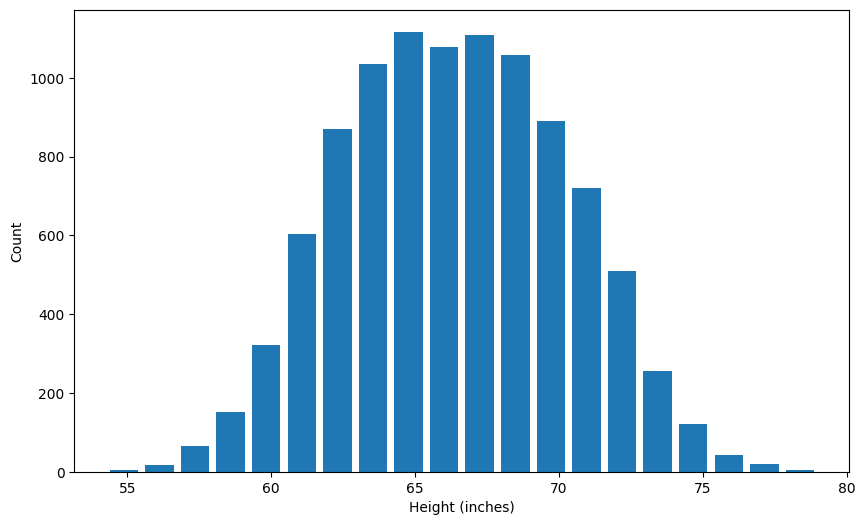

In [3]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

#Plot bell curve along with histogram for our dataset

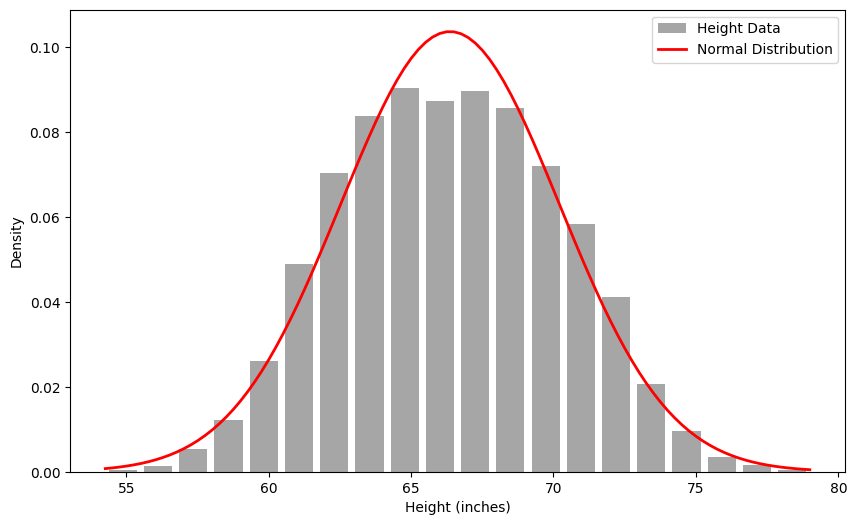

In [9]:
import numpy as np
from scipy.stats import norm

# Calculate mean and standard deviation
mean = df['height'].mean()
std = df['height'].std()

# Plot histogram
plt.hist(df['height'], bins=20, rwidth=0.8, density=True, color='gray', alpha=0.7, label='Height Data')

# Create and plot bell curve
x = np.linspace(df['height'].min(), df['height'].max(), 100)
bell_curve = norm.pdf(x, mean, std)
plt.plot(x, bell_curve, 'r-', lw=2, label='Normal Distribution')

plt.xlabel('Height (inches)')
plt.ylabel('Density')  # Changed to Density since we used density=True
plt.legend()  # Add legend to show labels
plt.show()

In [10]:
mean

np.float64(66.367559754866)

In [11]:
std

3.847528120795573

Here the mean is 66.37 and standard deviation is 3.84.

#(1) Outlier detection and removal using 3 standard deviation

One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [13]:
lower_limit = mean - 3 * std
upper_limit = mean + 3 * std
lower_limit, upper_limit

(np.float64(54.824975392479274), np.float64(77.91014411725271))

In [14]:
df[(df['height'] < lower_limit) | (df['height'] > upper_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers

**Now remove these outliers and generate new dataframe**

In [15]:
# Create new dataframe without outliers
df_no_outliers = df[(df['height'] >= lower_limit) & (df['height'] <= upper_limit)]
df_no_outliers

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [17]:
df_no_outliers.shape

(9993, 2)

In [19]:
df.shape

(10000, 2)

Above shows original dataframe data 10000 data points. Out of that we removed 7 outliers (i.e. 10000-9993)

#(2) Outlier detection and removal using Z Score

**Z score is a way to achieve same thing that we did above in part (1)**

**Z score indicates how many standard deviation away a data point is. **

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

In [20]:
df['z_score'] = (df['height'] - df['height'].mean()) / df['height'].std()

In [22]:
df.head()

,gender,height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [23]:
(73.84-66.37)/3.84

1.9453124999999998

**Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away**

In [24]:
# Define threshold (typically 3 or -3)
threshold = 3

In [25]:
outliers = df[df['z_score'].abs() > threshold]
outliers

,gender,height,z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [26]:
outliers.shape

(7, 3)

#Remove the outliers and produce new dataframe

In [27]:
# Create new dataframe without outliers
df_no_outliers = df[(df['z_score'].abs() <= threshold)]
df_no_outliers

,gender,height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [28]:
df_no_outliers.shape

(9993, 3)

In [29]:
df.shape

(10000, 3)

Above shows original dataframe data 10000 data points. Out of that we removed 7 outliers (i.e. 10000-9993)

#Exercise
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

# using percentile first

In [30]:
import pandas as pd

In [36]:
# Read the data
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [32]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [33]:
# Initial statistics
print("Initial Statistics:")
print(df['price_per_sqft'].describe())

Initial Statistics:
count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64


In [56]:
df.price_per_sqft.describe()

,price_per_sqft
count,1.320000e+04
mean,7.920337e+03
std,1.067272e+05
min,2.670000e+02
25%,4.267000e+03
50%,5.438000e+03
75%,7.317000e+03
max,1.200000e+07


Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

Also plot histogram to see how is the data distribution

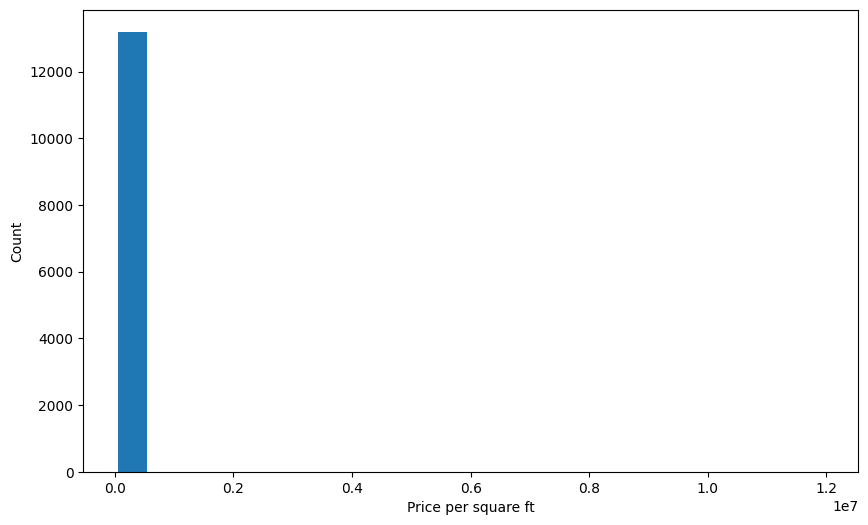

In [57]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using log scale can make visualization little better

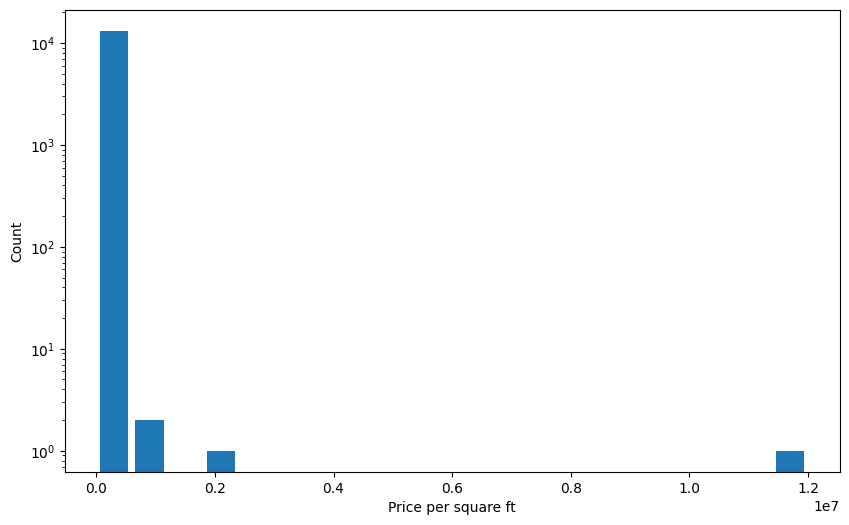

In [58]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

You see atleast few bars on right hand side of our highest building at least :)

#(1) Treat outliers using percentile first

In [59]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [60]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
7575,other,1 BHK,425.0,1.0,750.0,1,176470
1005,other,1 BHK,15.0,1.0,30.0,1,200000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
7012,other,1 BHK,650.0,1.0,500.0,1,76923
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [61]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [62]:
df.shape

(13200, 7)

In [63]:

df.shape[0] - df2.shape[0]

28

**We removed total 28 outliers**

#(2) Now remove outliers using 4 standard deviation

In [43]:
# Show sample outliers
print("\nSample of removed outliers:")
print(outliers[['location', 'size', 'total_sqft', 'price', 'price_per_sqft']].head())


Sample of removed outliers:
       location       size  total_sqft  price  price_per_sqft
345       other  3 Bedroom        11.0   74.0          672727
665   Yelahanka      3 BHK     35000.0  130.0             371
798       other  4 Bedroom     10961.0   80.0             729
1005      other      1 BHK        15.0   30.0          200000
1106      other  5 Bedroom        24.0  150.0          625000


#(2) Now remove outliers using 4 standard deviation

In [64]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(np.float64(23227.73653589429), np.float64(-9900.429065502549))

In [65]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3675,Kasturi Nagar,5 Bedroom,1650.0,5.0,450.0,5,27272
8861,Cunningham Road,5 Bedroom,2925.0,5.0,936.0,5,32000
4993,other,6 Bedroom,825.0,6.0,400.0,6,48484
1770,other,10 Bedroom,1660.0,10.0,475.0,10,28614
4645,other,10 Bedroom,2416.0,10.0,600.0,10,24834
4350,other,5 Bedroom,1750.0,5.0,450.0,5,25714
1548,Uttarahalli,5 Bedroom,400.0,5.0,200.0,5,50000
3752,other,4 Bedroom,1200.0,4.0,300.0,4,25000
12095,other,7 Bedroom,2240.0,4.0,700.0,7,31250
7110,BEML Layout,3 Bedroom,1200.0,5.0,325.0,3,27083


In [66]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [67]:
df2.shape[0]-df3.shape[0]

125

**In this step we removed total 125 outlierst**

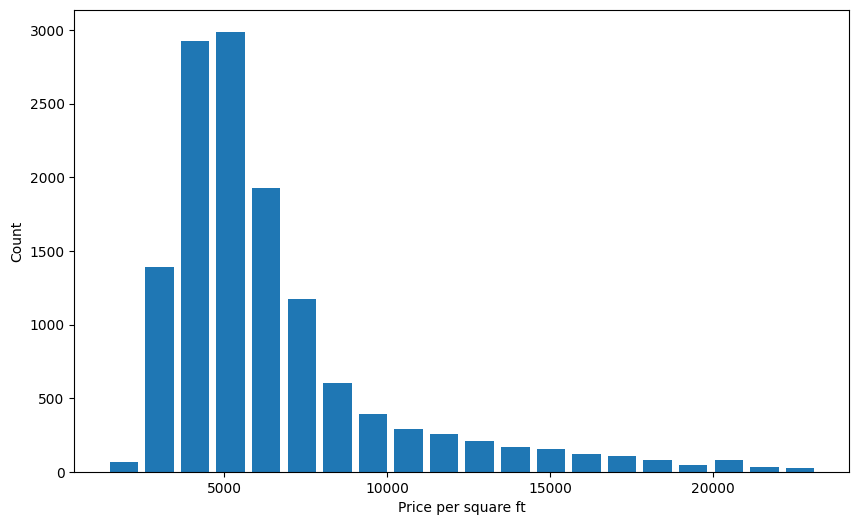

In [68]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

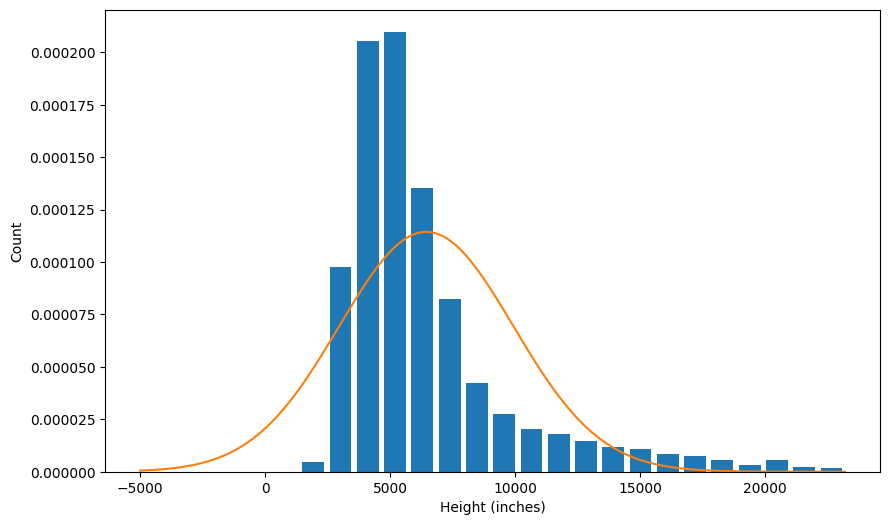

In [69]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

#(3) Now remove outliers using z score. Use z score of 4 as your thresold

In [70]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

<ipython-input-70-70754eb1335e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
2135,Gottigere,8 Bedroom,1200.0,8.0,90.00,8,7500,0.201966
9994,Uttarahalli,2 BHK,1107.0,2.0,45.00,2,4065,-0.627539
1104,Electronic City,3 BHK,1691.0,2.0,102.00,3,6031,-0.152777
13044,Kaggadasapura,2 BHK,1150.0,2.0,45.00,2,3913,-0.664245
10968,Yelahanka,3 BHK,1756.0,3.0,66.73,3,3800,-0.691533
6778,other,3 BHK,1410.0,3.0,65.00,3,4609,-0.496171
10087,Sarjapur Road,3 BHK,1691.0,3.0,100.00,3,5913,-0.181273
6717,Hegde Nagar,3 BHK,1965.0,4.0,132.00,3,6717,0.012882
2457,Bhoganhalli,1 RK,296.0,1.0,22.89,1,7733,0.258233
8610,Indira Nagar,3 BHK,1500.0,3.0,120.00,3,8000,0.322709


In [71]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [72]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
7643,other,4 BHK,5422.0,6.0,1900.0,4,35042,6.852983
9853,Indira Nagar,5 Bedroom,2400.0,5.0,700.0,5,29166,5.434010
4119,other,4 Bedroom,7000.0,5.0,2050.0,4,29285,5.462746
8082,Nagarbhavi,4 Bedroom,1200.0,3.0,340.0,4,28333,5.232851
4400,other,8 Bedroom,750.0,8.0,200.0,8,26666,4.830294


In [73]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [74]:
df2.shape[0] - df4.shape[0]


125

In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation